<a href="https://colab.research.google.com/github/Afix0/BP/blob/main/Clustering_algorithms_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ucimlrepo


In [3]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

mushroom = fetch_ucirepo(id=73)
mushroom_df = pd.DataFrame(data=mushroom.data.features)
# mushroom_df.head()

def preprocess_mushroom_data(df):

    mapping = {
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no bruises'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

    for column, mapping in mapping.items():
        df[column] = df[column].replace(mapping)

    return df

mushroom_df = preprocess_mushroom_data(mushroom_df).astype(str)

for column in mushroom_df.columns:
    split_columns = column.split("-")
    jointed_columns = ' '.join(split_columns)
    mushroom_df[column] = mushroom_df[column].apply(lambda x: f"{jointed_columns} is {x}")

mushroom_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,cap shape is convex,cap surface is smooth,cap color is brown,bruises is bruises,odor is pungent,gill attachment is free,gill spacing is close,gill size is narrow,gill color is black,stalk shape is enlarging,...,stalk surface below ring is smooth,stalk color above ring is white,stalk color below ring is white,veil type is partial,veil color is white,ring number is one,ring type is pendant,spore print color is black,population is scattered,habitat is urban
1,cap shape is convex,cap surface is smooth,cap color is yellow,bruises is bruises,odor is almond,gill attachment is free,gill spacing is close,gill size is broad,gill color is black,stalk shape is enlarging,...,stalk surface below ring is smooth,stalk color above ring is white,stalk color below ring is white,veil type is partial,veil color is white,ring number is one,ring type is pendant,spore print color is brown,population is numerous,habitat is grasses
2,cap shape is bell,cap surface is smooth,cap color is white,bruises is bruises,odor is anise,gill attachment is free,gill spacing is close,gill size is broad,gill color is brown,stalk shape is enlarging,...,stalk surface below ring is smooth,stalk color above ring is white,stalk color below ring is white,veil type is partial,veil color is white,ring number is one,ring type is pendant,spore print color is brown,population is numerous,habitat is meadows
3,cap shape is convex,cap surface is scaly,cap color is white,bruises is bruises,odor is pungent,gill attachment is free,gill spacing is close,gill size is narrow,gill color is brown,stalk shape is enlarging,...,stalk surface below ring is smooth,stalk color above ring is white,stalk color below ring is white,veil type is partial,veil color is white,ring number is one,ring type is pendant,spore print color is black,population is scattered,habitat is urban
4,cap shape is convex,cap surface is smooth,cap color is gray,bruises is no bruises,odor is none,gill attachment is free,gill spacing is crowded,gill size is broad,gill color is black,stalk shape is tapering,...,stalk surface below ring is smooth,stalk color above ring is white,stalk color below ring is white,veil type is partial,veil color is white,ring number is one,ring type is evanescent,spore print color is brown,population is abundant,habitat is grasses


In [4]:
sentences = []
for i in range(len(mushroom_df)):
    sentence = []
    for word in mushroom_df.iloc[i]:
        sentence.append(word)
    sentences.append(sentence)

print(len(sentences))

8124


In [5]:
import numpy as np
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import LabelEncoder
import inspect


def sentence_embedding(sentence, model):
    word_embeddings = []
    for word in sentence:
        word_embeddings.append(model.wv[word])
    return np.mean(word_embeddings, axis=0)


def plot_sentence_embeddings(embeddings, cluster_labels=None, target_labels=None, clustering_method=None):
    plt.figure(figsize=(15, 10))
    tsne = TSNE(n_components=2, random_state= 73, perplexity=300, learning_rate=200, max_iter=1000)
    embeddings_2d = tsne.fit_transform(np.array(embeddings))
    cmap = plt.colormaps['hsv']
    arg_names = inspect.getfullargspec(plot_sentence_embeddings).args


    if cluster_labels is not None and target_labels is None:
        n_clusters = len(set(cluster_labels))
        cmap = cm.get_cmap('hsv', n_clusters)
        colors = cmap(np.linspace(0, 1, n_clusters))
        handles = [plt.Line2D([], [], color=color) for color in colors]
        labels = [f"Cluster {i}" for i in range(n_clusters)]
        scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors[cluster_labels])

        plt.legend(handles=handles, labels=labels, title=f"Clusters created with {clustering_method}", loc = "upper right")

    elif target_labels is not None and cluster_labels is None:

        edible_color = 'green'
        poisonous_color = 'red'

        colors = [edible_color if label == 'edible' else poisonous_color for label in target_labels]

        scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)
        handles = [plt.Line2D([], [], color=edible_color, label='Edible'), plt.Line2D([], [], color=poisonous_color, label='Poisonous')]

        labels = ['Edible', 'Poisonous']

        plt.legend(handles=handles, labels=labels, title="Classes", loc="upper right")


    else:
        plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=range(len(sentences)), cmap=cmap)

    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title(f"Sentence Embeddings Visualization")
    plt.show()

https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.AgglomerativeClustering.html

<ipython-input-5-39e1ab5298ad>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv', n_clusters)


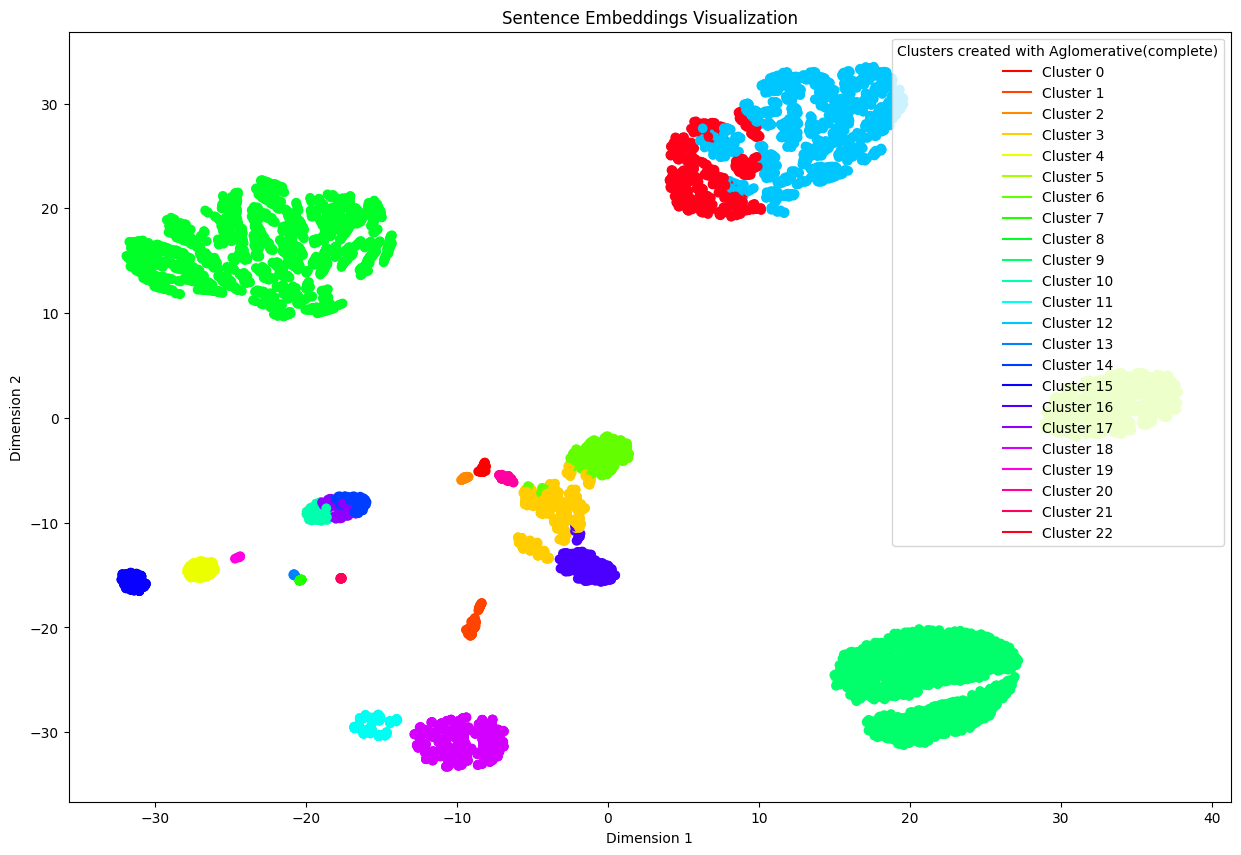

<ipython-input-5-39e1ab5298ad>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv', n_clusters)


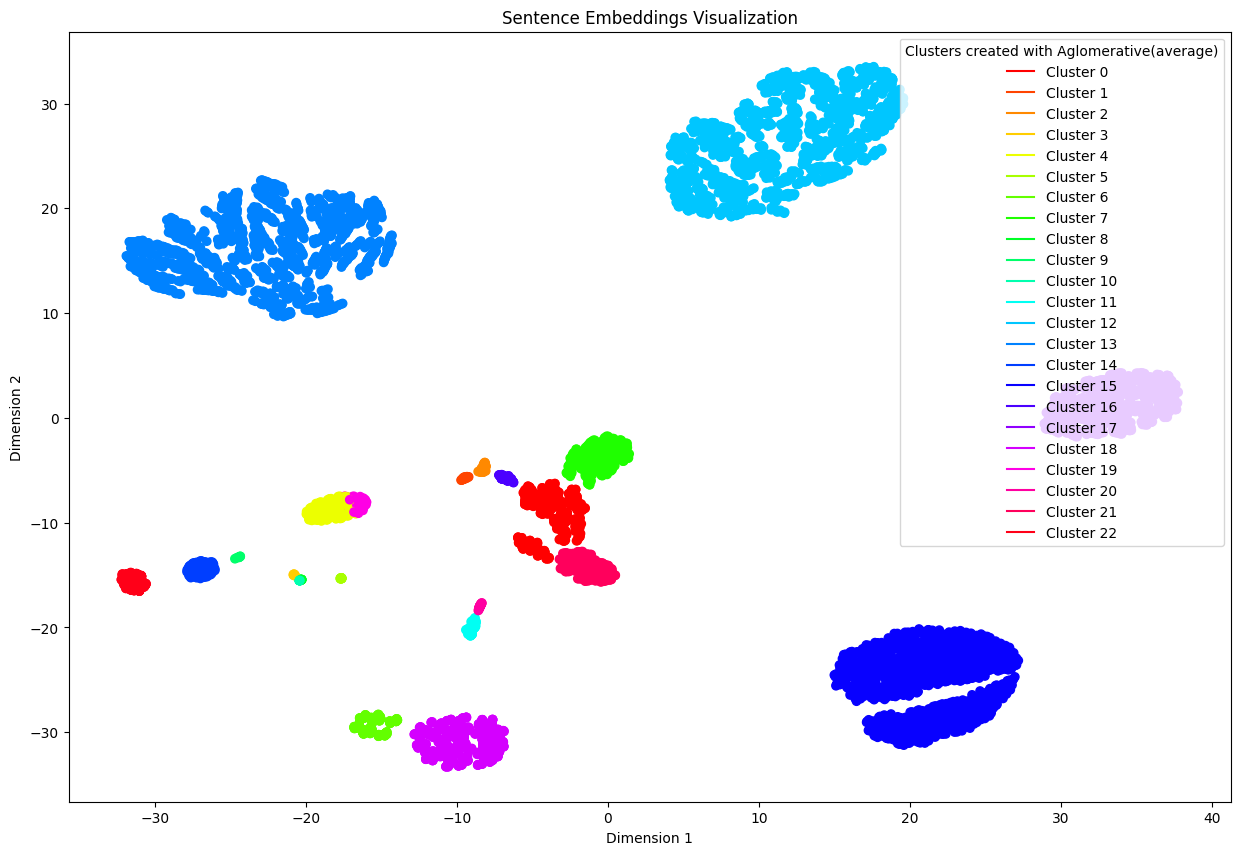

<ipython-input-5-39e1ab5298ad>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv', n_clusters)


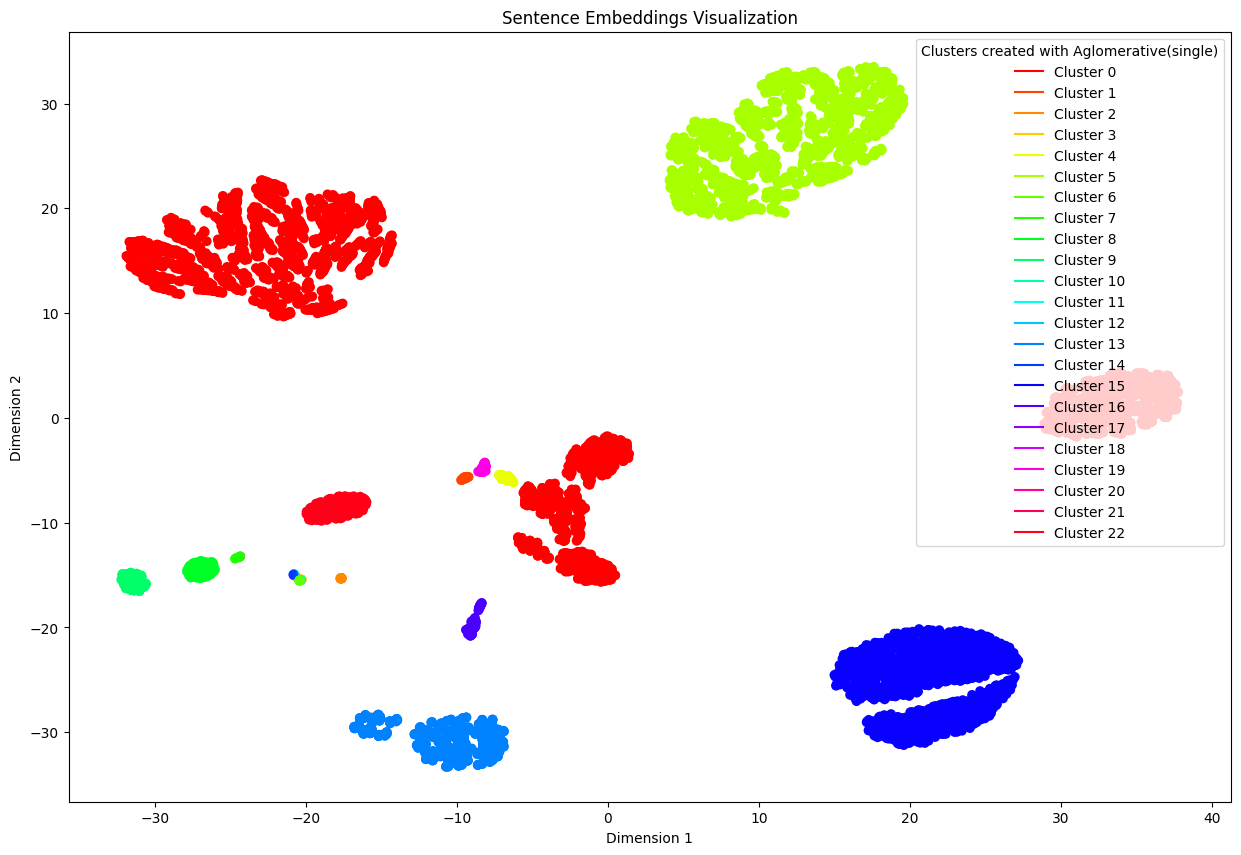

In [6]:
#Aglomerative clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

model = Word2Vec(sentences, min_count=1, vector_size=20, window=5)
embeddings = np.array([sentence_embedding(sentence, model) for sentence in sentences])

labels_aglomerative_complete = AgglomerativeClustering(n_clusters= 23, metric = 'cosine', linkage='complete').fit_predict(embeddings)
labels_aglomerative_average = AgglomerativeClustering(n_clusters= 23, metric = 'cosine', linkage='average').fit_predict(embeddings)
labels_aglomerative_single = AgglomerativeClustering(n_clusters= 23, metric = 'cosine', linkage='single').fit_predict(embeddings)
plot_sentence_embeddings(embeddings, labels_aglomerative_complete, clustering_method = "Aglomerative(complete)")
plot_sentence_embeddings(embeddings, labels_aglomerative_average, clustering_method = "Aglomerative(average)")
plot_sentence_embeddings(embeddings, labels_aglomerative_single, clustering_method = "Aglomerative(single)")

<ipython-input-5-39e1ab5298ad>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv', n_clusters)


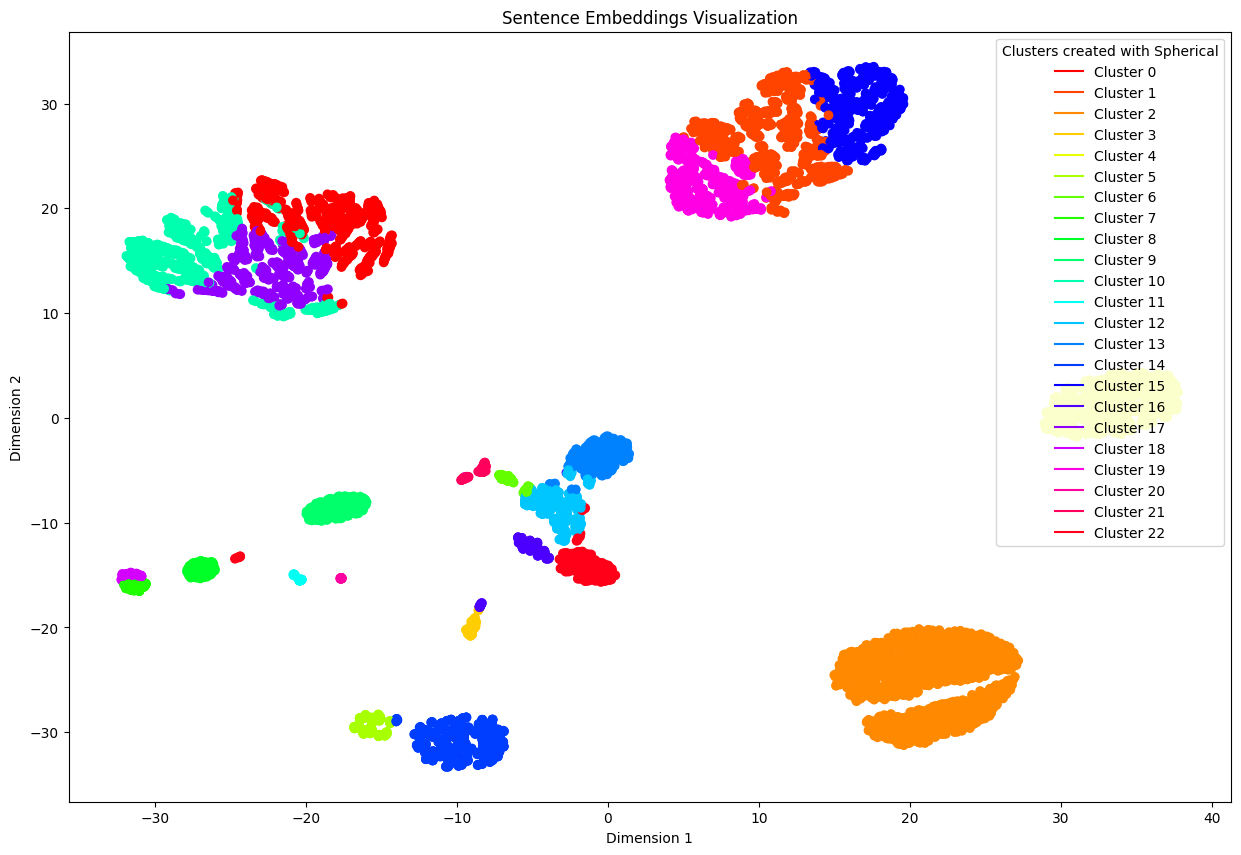

In [7]:
#Spherical kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import numpy as np

normalized_embeddings = normalize(embeddings, norm='l2')

spherical_kmeans = KMeans(n_clusters=23, init='k-means++', random_state=42)
spherical_kmeans.fit(normalized_embeddings)
labels_spherical = spherical_kmeans.labels_

plot_sentence_embeddings(embeddings, labels_spherical, clustering_method="Spherical")

<ipython-input-5-39e1ab5298ad>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv', n_clusters)


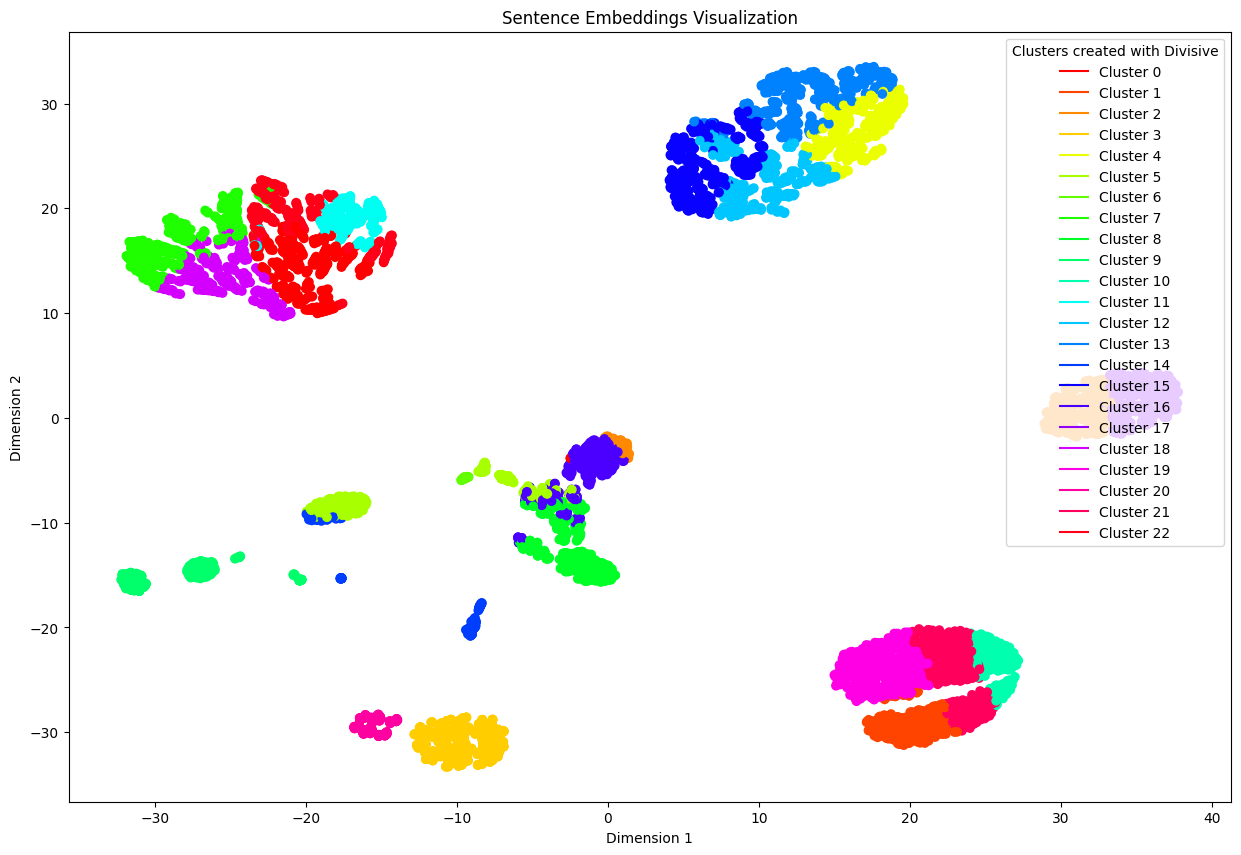

In [13]:
#GPT implementace divisive clustering algoritmu

def divisive_clustering(data, n_clusters):
    """
    Perform divisive clustering using cosine similarity.

    Parameters:
        data (np.array): Input data, shape (n_samples, n_features).
        n_clusters (int): Desired number of clusters.

    Returns:
        list: Cluster labels for each data point.
    """
    # Start with all points in one cluster
    clusters = {0: data}
    labels = np.zeros(data.shape[0], dtype=int)

    current_cluster_id = 1

    while len(clusters) < n_clusters:
        # Find the cluster with the largest size to split
        largest_cluster_id = max(clusters, key=lambda k: len(clusters[k]))
        largest_cluster_data = clusters[largest_cluster_id]

        if len(largest_cluster_data) <= 1:
            # If the cluster has only one point, it cannot be split further
            break

        # Perform K-means clustering with k=2 on the selected cluster
        kmeans = KMeans(n_clusters=2, random_state=42)
        cluster_split = kmeans.fit_predict(largest_cluster_data)

        # Assign points to new clusters
        cluster_1 = largest_cluster_data[cluster_split == 0]
        cluster_2 = largest_cluster_data[cluster_split == 1]

        # Update labels for the split cluster
        cluster_indices = np.where(labels == largest_cluster_id)[0]
        labels[cluster_indices[cluster_split == 0]] = largest_cluster_id
        labels[cluster_indices[cluster_split == 1]] = current_cluster_id

        # Update clusters dictionary
        clusters[largest_cluster_id] = cluster_1
        clusters[current_cluster_id] = cluster_2

        current_cluster_id += 1

    return labels

n_clusters = 23
labels_divisive = divisive_clustering(embeddings, n_clusters=n_clusters)
plot_sentence_embeddings(embeddings, labels_divisive, clustering_method="Divisive")



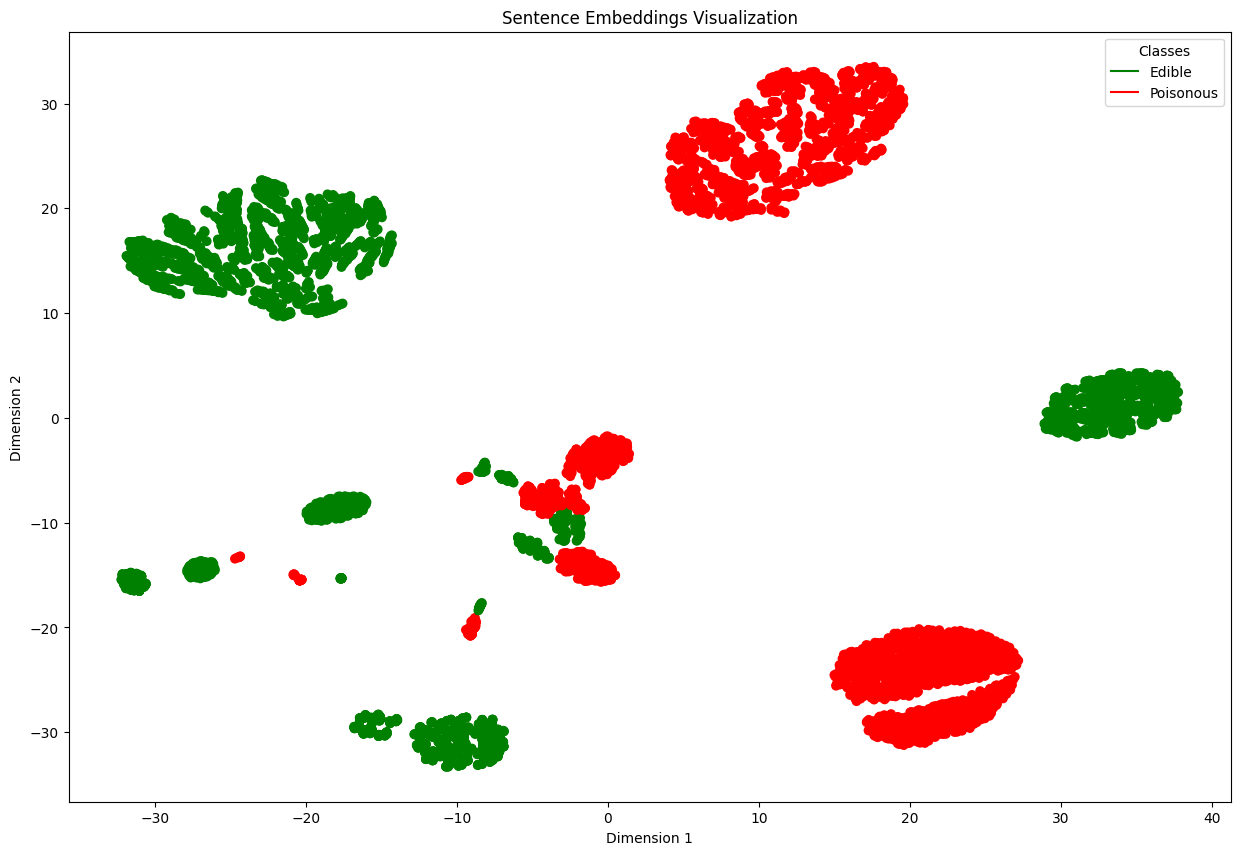

In [8]:
mapping_targets = {'p': 'poisonous', 'e': 'edible'}

targets_df = pd.DataFrame(data=mushroom.data.targets)
targets_df.columns = ['class']
targets_df['class'] = targets_df['class'].map(mapping_targets)
targets_df.head()
plot_sentence_embeddings(embeddings, target_labels=np.array(targets_df['class']))

In [14]:
from collections import Counter
def count_mixed_clusters(cluster_labels, class_labels, clustering_method):
    cluster_label_to_class = {}

    mixed_cluster_count = 0
    for i, label in enumerate(cluster_labels):
        if label not in cluster_label_to_class:
            cluster_label_to_class[label] = class_labels[i]
        else:
            if cluster_label_to_class[label] != class_labels[i]:
                cluster_label_to_class[label] = 'mixed'

    edible_cluster_indices = [cluster_label for cluster_label, class_label in cluster_label_to_class.items() if class_label == 'edible']
    poisonous_cluster_indices = [cluster_label for cluster_label, class_label in cluster_label_to_class.items() if class_label == 'poisonous']
    mixed_cluster_indices = [cluster_label for cluster_label, class_label in cluster_label_to_class.items() if class_label == 'mixed']
    print(f"Indexes of clusters made by {clustering_method} labeled as edible:", edible_cluster_indices)
    print(f"Indexes of clusters made by {clustering_method} labeled as poisonous:", poisonous_cluster_indices)
    print(f"Indexes of clusters made by {clustering_method} labeled as mixed: ", mixed_cluster_indices)

methods = {'Aglomerative(complete)' : labels_aglomerative_complete,
           'Aglomerative(average)' : labels_aglomerative_average,
           'Aglomerative(single)' : labels_aglomerative_single,
           'Spherical' : labels_spherical,
           'Divisive' : labels_divisive}
for method, labels in methods.items():
    count_mixed_clusters(labels, np.array(targets_df['class']), method)

Indexes of clusters made by Aglomerative(complete) labeled as edible: [18, 5, 11, 8, 4, 20, 0, 15, 14, 10, 17, 21]
Indexes of clusters made by Aglomerative(complete) labeled as poisonous: [9, 6, 12, 2, 19, 22, 7, 13]
Indexes of clusters made by Aglomerative(complete) labeled as mixed:  [16, 3, 1]
Indexes of clusters made by Aglomerative(average) labeled as edible: [18, 17, 6, 13, 14, 16, 2, 22, 19, 20, 4, 5]
Indexes of clusters made by Aglomerative(average) labeled as poisonous: [21, 15, 7, 12, 11, 1, 9, 8, 10, 3]
Indexes of clusters made by Aglomerative(average) labeled as mixed:  [0]
Indexes of clusters made by Aglomerative(single) labeled as edible: [13, 8, 4, 19, 9, 22, 2]
Indexes of clusters made by Aglomerative(single) labeled as poisonous: [15, 5, 1, 7, 21, 3, 6, 20, 10, 18, 14, 17, 11, 12]
Indexes of clusters made by Aglomerative(single) labeled as mixed:  [0, 16]
Indexes of clusters made by Spherical labeled as edible: [14, 4, 5, 17, 10, 0, 8, 7, 18, 9, 20]
Indexes of clusters